## Data Overview:

In [1]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt                                                 
import seaborn as sns 
from sklearn import preprocessing

import warnings
warnings.filterwarnings("ignore")

In [2]:
# loading the data
sensor_data = pd.read_csv('pump_sensor.csv')
sensor_data.head()

,Unnamed: 0,timestamp,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,...,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,machine_status
0,0,2018-04-01 00:00:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
1,1,2018-04-01 00:01:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
2,2,2018-04-01 00:02:00,2.444734,47.35243,53.2118,46.397570,638.8889,73.54598,13.32465,16.03733,...,41.66666,39.351852,65.39352,51.21528,38.194443,155.9606,67.12963,241.3194,203.7037,NORMAL
3,3,2018-04-01 00:03:00,2.460474,47.09201,53.1684,46.397568,628.1250,76.98898,13.31742,16.24711,...,40.88541,39.062500,64.81481,51.21528,38.194440,155.9606,66.84028,240.4514,203.1250,NORMAL
4,4,2018-04-01 00:04:00,2.445718,47.13541,53.2118,46.397568,636.4583,76.58897,13.35359,16.21094,...,41.40625,38.773150,65.10416,51.79398,38.773150,158.2755,66.55093,242.1875,201.3889,NORMAL


In [3]:
sensor_data.tail()

,Unnamed: 0,timestamp,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,...,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,machine_status
220315,220315,2018-08-31 23:55:00,2.407350,47.69965,50.520830,43.142361,634.722229,64.59095,15.11863,16.65220,...,38.28125,68.28703,52.37268,48.32176,41.087960,212.3843,153.6458,NaN,231.1921,NORMAL
220316,220316,2018-08-31 23:56:00,2.400463,47.69965,50.564240,43.142361,630.902771,65.83363,15.15480,16.70284,...,38.28125,66.84028,50.63657,48.03241,40.798610,213.8310,156.2500,NaN,231.1921,NORMAL
220317,220317,2018-08-31 23:57:00,2.396528,47.69965,50.520830,43.142361,625.925903,67.29445,15.08970,16.70284,...,39.06250,65.39352,48.90046,48.03241,40.798610,217.3032,155.3819,NaN,232.0602,NORMAL
220318,220318,2018-08-31 23:58:00,2.406366,47.69965,50.520832,43.142361,635.648100,65.09175,15.11863,16.56539,...,40.62500,64.23611,47.74306,48.32176,40.509258,222.5116,153.9352,NaN,234.0856,NORMAL
220319,220319,2018-08-31 23:59:00,2.396528,47.69965,50.520832,43.142361,639.814800,65.45634,15.11863,16.65220,...,41.40625,62.78935,46.29630,48.90046,40.219910,227.4306,150.4630,NaN,234.0856,NORMAL


In [4]:
print('All the columns:')
print()
print(sensor_data.columns)

All the columns:

Index(['Unnamed: 0', 'timestamp', 'sensor_00', 'sensor_01', 'sensor_02',
       'sensor_03', 'sensor_04', 'sensor_05', 'sensor_06', 'sensor_07',
       'sensor_08', 'sensor_09', 'sensor_10', 'sensor_11', 'sensor_12',
       'sensor_13', 'sensor_14', 'sensor_15', 'sensor_16', 'sensor_17',
       'sensor_18', 'sensor_19', 'sensor_20', 'sensor_21', 'sensor_22',
       'sensor_23', 'sensor_24', 'sensor_25', 'sensor_26', 'sensor_27',
       'sensor_28', 'sensor_29', 'sensor_30', 'sensor_31', 'sensor_32',
       'sensor_33', 'sensor_34', 'sensor_35', 'sensor_36', 'sensor_37',
       'sensor_38', 'sensor_39', 'sensor_40', 'sensor_41', 'sensor_42',
       'sensor_43', 'sensor_44', 'sensor_45', 'sensor_46', 'sensor_47',
       'sensor_48', 'sensor_49', 'sensor_50', 'sensor_51', 'machine_status'],
      dtype='object')


In [5]:
# total number of data points
sensor_data.shape[0]

220320

### Observations:
* Dataset contains 220320 data points
* Data contains readings from 52 sensors and corresponding time
stamps
* Sensor data of 5 months from April to August is provided. Each
row contains sensor  
readings after every minute
* What parameter each sensor is measuring is not specified

## EDA and Data Preprocessing-I:

### Class Distribution:

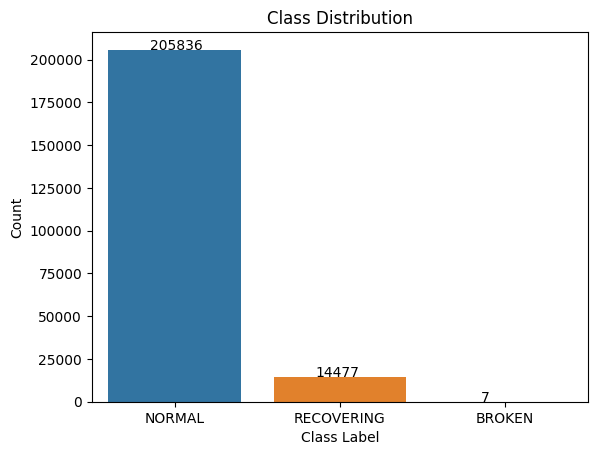

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

def get_class_distribution(df, col=None):
    """
    Function to plot class distribution
    """
    if col == 'machine_status': # if column = machine_status
        # Counting class labels
        label_count = df['machine_status'].value_counts() 
    elif col == 'label': # if column = label
        label_count = df['label'].value_counts()
    else:
        label_count = df.value_counts()
    # bar plot
    plot = sns.barplot(x=list(label_count.index), y=list(label_count.values))
    plt.title('Class Distribution')
    plt.xlabel('Class Label')
    plt.ylabel('Count')

    # adding class count to the barplot
    for patch in plot.patches:
        # formatting and positioning the count values
        plot.annotate('{:n}'.format(patch.get_height()), 
                      (patch.get_x()+0.25, patch.get_height()+1)) 
    plt.show()

# Example usage
get_class_distribution(sensor_data, 'machine_status')

### Machine Status

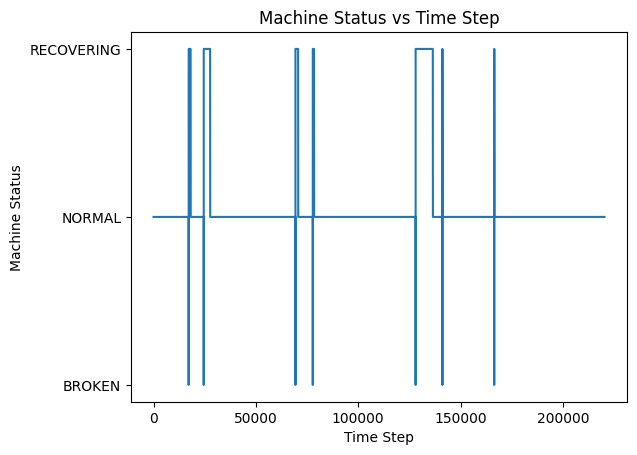

In [16]:
# label encoding
le = preprocessing.LabelEncoder() # creating label encoder
y = le.fit_transform(sensor_data['machine_status']) # fitting on labels
x = list(sensor_data.index)
plt.plot(x, y)
plt.xlabel('Time Step')
plt.ylabel('Machine Status')
plt.title('Machine Status vs Time Step')

encode_labels = list(le.transform(list(le.classes_))) # encoded labels
labels = list(le.classes_) # labels
plt.yticks(encode_labels, labels)
plt.show()

### Relabeling the data

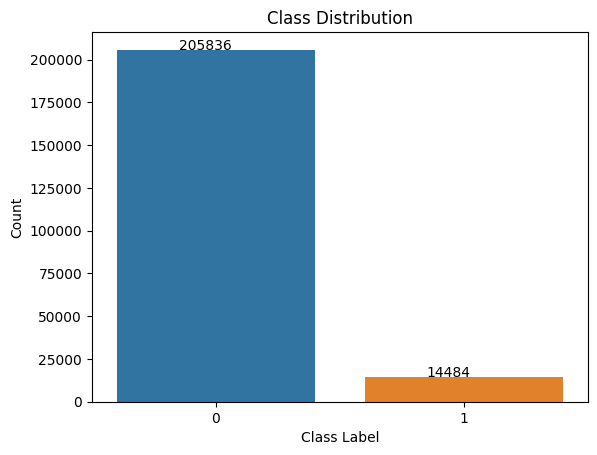


Machine status after re-labeling the data



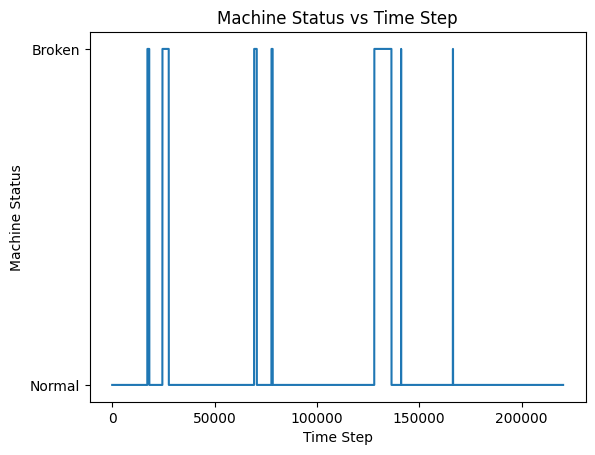

In [31]:
# encoding labels as 0 and 1
# 0 = normal
# 1 = broken
sensor_data['label'] = sensor_data['machine_status'].map(lambda label: 0
                                                if label == 'NORMAL' else 1) 

get_class_distribution(sensor_data, 'label')
print()


# changing machine status recovery to broken
sensor_data['new_machine_status'] = sensor_data['machine_status'].map(lambda 
                        label:  'BROKEN' if label != 'NORMAL' else 'NORMAL')


print("Machine status after re-labeling the data")
print()
x = list(sensor_data.index) 

# reversing labels for better visualization
y = list(sensor_data['label'])

plt.plot(x, y)
plt.xlabel('Time Step')
plt.ylabel('Machine Status')
plt.title('Machine Status vs Time Step')

encode_labels = [0, 1] # encoded labels
labels = ['Normal', 'Broken'] # labels 
plt.yticks(encode_labels, labels)
plt.show()

#### Observations:
* Number of NORMAL(label = 1) class points = 205836
* Number of BROKEN(label = 0) class points = 14484

In [ ]:
sensor_data

,Unnamed: 0,timestamp,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,...,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,machine_status,label,new_machine_status
0,0,2018-04-01 00:00:00,2.465394,47.09201,53.211800,46.310760,634.375000,76.45975,13.41146,16.13136,...,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL,0,NORMAL
1,1,2018-04-01 00:01:00,2.465394,47.09201,53.211800,46.310760,634.375000,76.45975,13.41146,16.13136,...,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL,0,NORMAL
2,2,2018-04-01 00:02:00,2.444734,47.35243,53.211800,46.397570,638.888900,73.54598,13.32465,16.03733,...,65.39352,51.21528,38.194443,155.9606,67.12963,241.3194,203.7037,NORMAL,0,NORMAL
3,3,2018-04-01 00:03:00,2.460474,47.09201,53.168400,46.397568,628.125000,76.98898,13.31742,16.24711,...,64.81481,51.21528,38.194440,155.9606,66.84028,240.4514,203.1250,NORMAL,0,NORMAL
4,4,2018-04-01 00:04:00,2.445718,47.13541,53.211800,46.397568,636.458300,76.58897,13.35359,16.21094,...,65.10416,51.79398,38.773150,158.2755,66.55093,242.1875,201.3889,NORMAL,0,NORMAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220315,220315,2018-08-31 23:55:00,2.407350,47.69965,50.520830,43.142361,634.722229,64.59095,15.11863,16.65220,...,52.37268,48.32176,41.087960,212.3843,153.64580,NaN,231.1921,NORMAL,0,NORMAL
220316,220316,2018-08-31 23:56:00,2.400463,47.69965,50.564240,43.142361,630.902771,65.83363,15.15480,16.70284,...,50.63657,48.03241,40.798610,213.8310,156.25000,NaN,231.1921,NORMAL,0,NORMAL
220317,220317,2018-08-31 23:57:00,2.396528,47.69965,50.520830,43.142361,625.925903,67.29445,15.08970,16.70284,...,48.90046,48.03241,40.798610,217.3032,155.38190,NaN,232.0602,NORMAL,0,NORMAL
220318,220318,2018-08-31 23:58:00,2.406366,47.69965,50.520832,43.142361,635.648100,65.09175,15.11863,16.56539,...,47.74306,48.32176,40.509258,222.5116,153.93520,NaN,234.0856,NORMAL,0,NORMAL


### Missing Values:

Missing Value Count



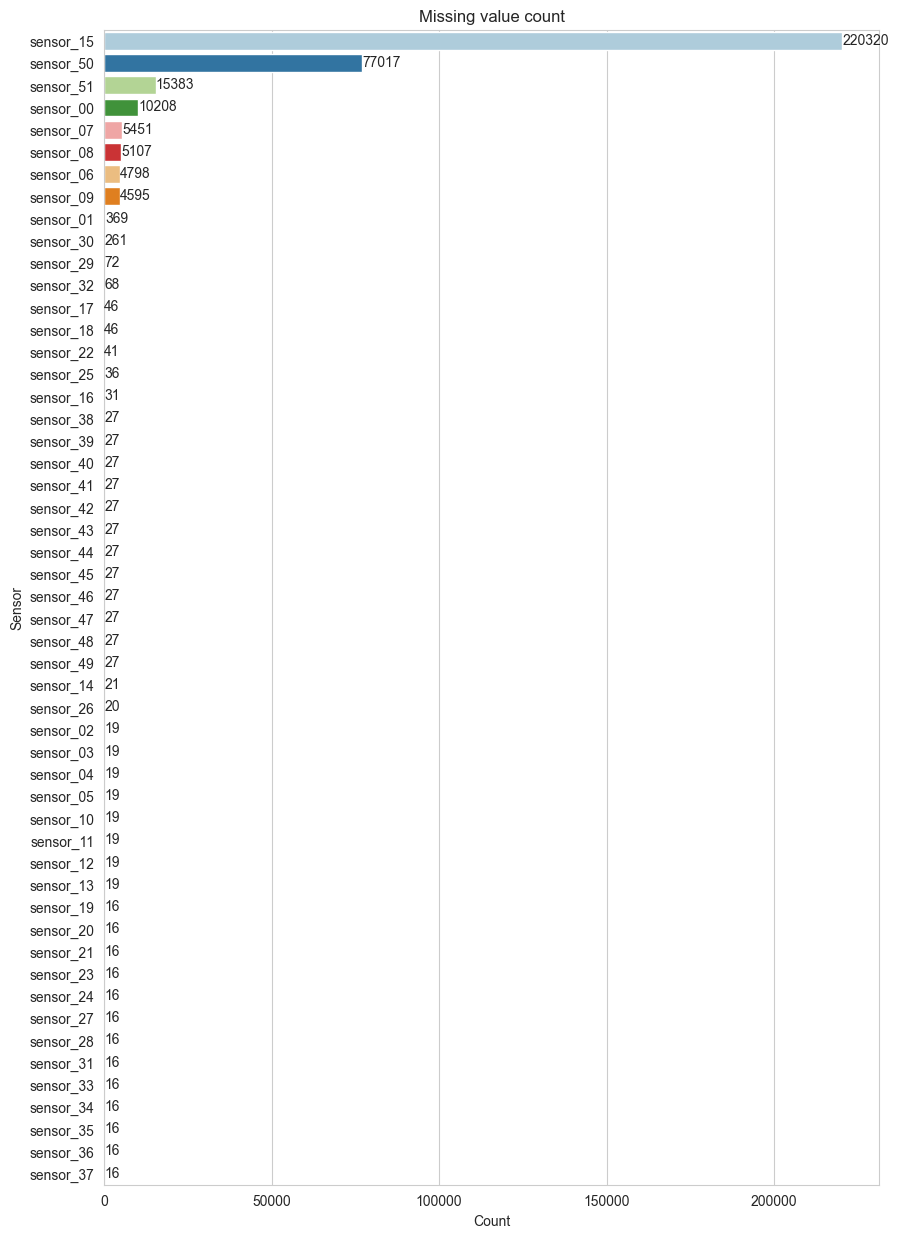

In [37]:
print("Missing Value Count")
print()

null_count = sensor_data.isna().sum()# count null values
# considering only sensor columns
null_count = null_count[2:-3] 

count_dict = {}

# creating dictionary of column and null value count
for i, j in zip(null_count.index, null_count.values):
    count_dict[i] = j

# sorting the dictionary
count_dict = {k:v for k, v in sorted(count_dict.items(), 
                                     key=lambda item: item[1], reverse=True)}
sns.set_style(style="whitegrid")
plt.figure(figsize=(10,15))
plot = sns.barplot(x=list(count_dict.values()), 
                   y=list(count_dict.keys()), palette='Paired')

for p in plot.patches:
    _x = p.get_x() + p.get_width() + 0.5 
    _y = p.get_y() + p.get_height() - 0.25 
    value = int(p.get_width())
    plot.text(_x, _y, value, ha="left")

plot.set_title("Missing value count")
plot.set_ylabel("Sensor")
plot.set_xlabel("Count")
plt.show()

Percentage Missing Values 



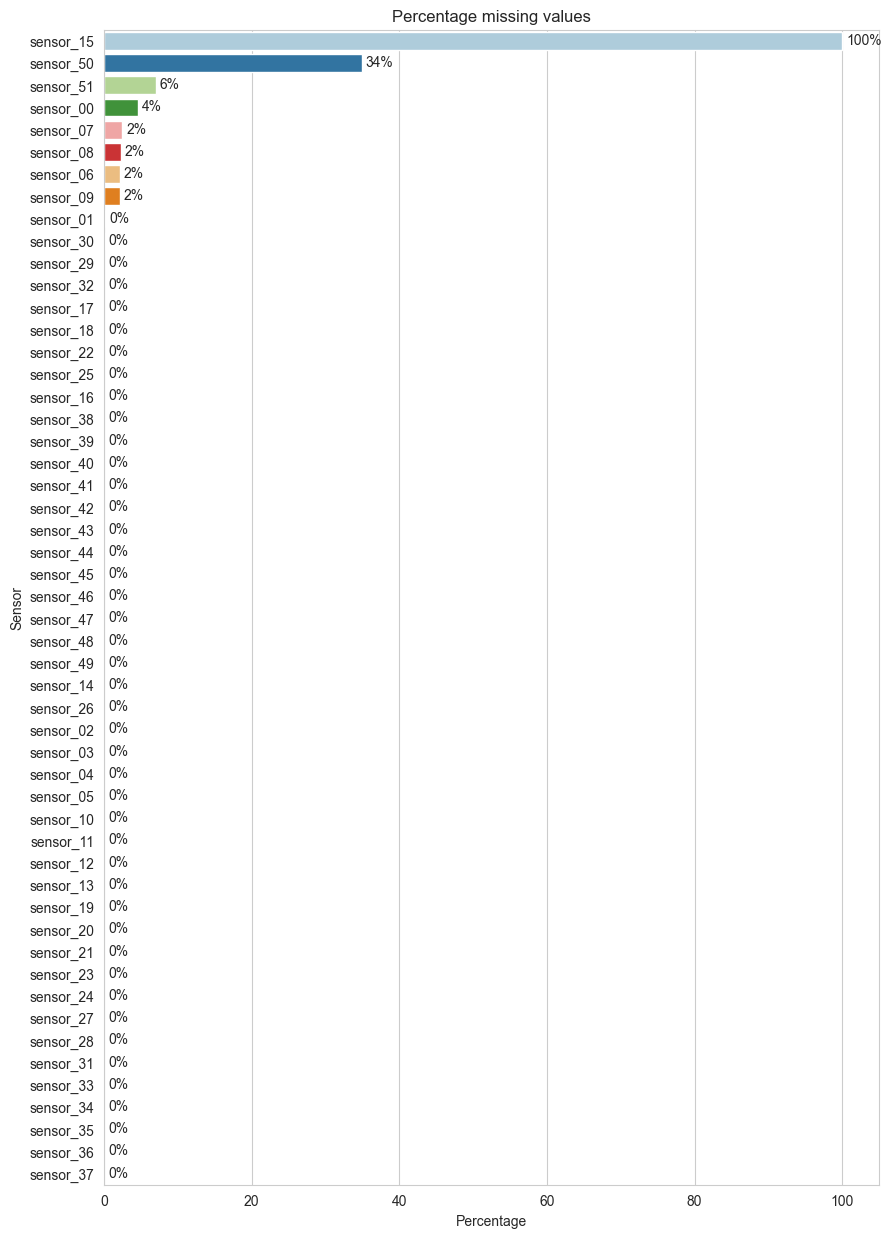

In [38]:
print("Percentage Missing Values ")
print()

# percentage null values
null_count = sensor_data.isna().sum()/sensor_data.shape[0] * 100 
null_count = null_count[2:-3] # considering only sensor columns

percent_null = {}

# creating dictionary of column and percentage null value
for i, j in zip(null_count.index, null_count.values):
    percent_null[i] = j

# sorting the dictionary
percent_null = {k:v for k, v in sorted(percent_null.items(), 
                                       key=lambda item: item[1], reverse=True)}

sns.set_style(style="whitegrid")
plt.figure(figsize=(10,15))

plot = sns.barplot(x=list(percent_null.values()), 
                   y=list(percent_null.keys()), palette='Paired')

for p in plot.patches:
    _x = p.get_x() + p.get_width() + 0.5
    _y = p.get_y() + p.get_height() - 0.25
    value = f'{int(p.get_width())}%'
    plot.text(_x, _y, value, ha="left")

plot.set_title("Percentage missing values")
plot.set_ylabel("Sensor")
plot.set_xlabel("Percentage")
plt.show()

### Plot Missing Values:

In [39]:
def plot_missing (sensor_num, df):
    """
    Function to plot machine status, sensor readings variation with time
    Also to plot missing values
    """
    scaler = MinMaxScaler()
    scaled = scaler.fit_transform(df[[sensor_num]])
    null_sensor = df[df[sensor_num].isnull()][sensor_num]

    plt.figure(figsize=(10, 4))
    plt.plot(list(df.index), list(scaled), label='readings')
    plt.scatter(list(null_sensor.index), [0]*len(null_sensor.index), 
                color = 'red', label='missing values')
    
    # reversing labels for better visualization
    y = list(sensor_data['label'].map(lambda label:  1 if label == 0 else 0))
    plt.plot(list(df.index), y, color = 'green', label='machine status')

    encode_labels = [1, 0] # encoded labels
    labels = ['NORMAL', 'BROKEN'] # labels
    plt.yticks(encode_labels, labels)

    plt.legend()
    plt.xlabel('Time Step')
    plt.ylabel(f'{sensor_num} readings')
    plt.title(f'{sensor_num} readings vs Time')
    plt.show()

#### Sensor_50

In [ ]:
plot_missing('sensor_50', sensor_data)

#### Sensor_51

In [ ]:
plot_missing('sensor_51', sensor_data)

#### Sensor_00

In [ ]:
plot_missing('sensor_00', sensor_data)

#### Sensor_07

In [ ]:
plot_missing('sensor_07', sensor_data)

#### Sensor_08

In [ ]:
plot_missing('sensor_08', sensor_data)

#### Sensor_06

In [ ]:
plot_missing('sensor_06', sensor_data)

#### Sensor_09

In [ ]:
plot_missing('sensor_09', sensor_data)

#### Sensor_01

In [ ]:
plot_missing('sensor_01', sensor_data)

#### Sensor_30

In [ ]:
plot_missing('sensor_30', sensor_data)

#### Sensor_29

In [ ]:
plot_missing('sensor_29', sensor_data)

#### Sensor_32

In [ ]:
plot_missing('sensor_32', sensor_data)

#### Sensor_17

In [ ]:
plot_missing('sensor_17', sensor_data)

#### Sensor_18

In [ ]:
plot_missing('sensor_18', sensor_data)

#### Sensor_22

In [ ]:
plot_missing('sensor_22', sensor_data)

#### Sensor_25

In [ ]:
plot_missing('sensor_25', sensor_data)

#### Sensor_16

In [ ]:
plot_missing('sensor_16', sensor_data)

#### Sensor_38

In [ ]:
plot_missing('sensor_38', sensor_data)

#### Sensor_39

In [ ]:
plot_missing('sensor_39', sensor_data)

#### Sensor_40

In [ ]:
plot_missing('sensor_40', sensor_data)

#### Sensor_41

In [ ]:
plot_missing('sensor_41', sensor_data)

#### Sensor_42

In [ ]:
plot_missing('sensor_42', sensor_data)

#### Sensor_43

In [ ]:
plot_missing('sensor_43', sensor_data)

#### Sensor_44

In [ ]:
plot_missing('sensor_44', sensor_data)

#### Sensor_45

In [ ]:
plot_missing('sensor_45', sensor_data)

#### Sensor_46

In [ ]:
plot_missing('sensor_46', sensor_data)

#### Sensor_47

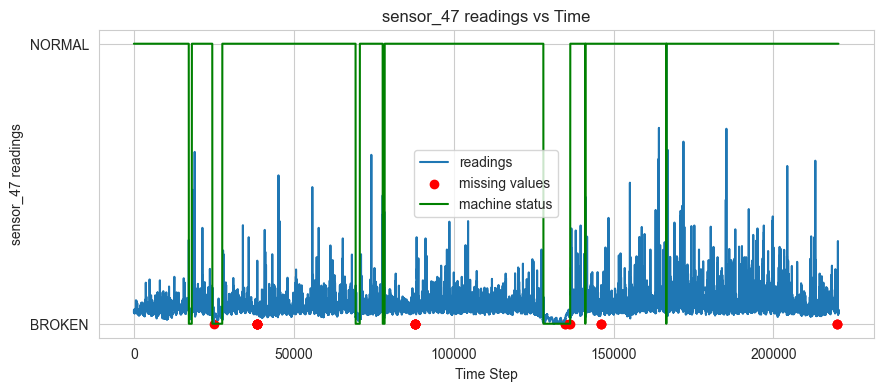

In [40]:
plot_missing('sensor_47', sensor_data)

#### Sensor_48

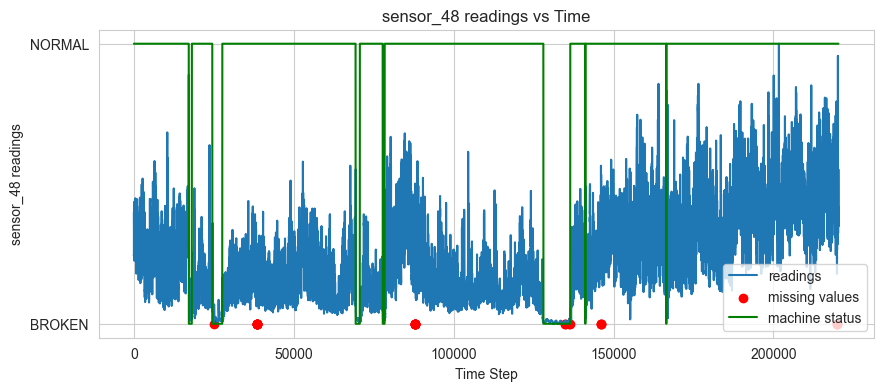

In [41]:
plot_missing('sensor_48', sensor_data)

#### Sensor_49

In [ ]:
plot_missing('sensor_49', sensor_data)

#### Sensor_14

In [ ]:
plot_missing('sensor_14', sensor_data)

#### Sensor_26

In [ ]:
plot_missing('sensor_26', sensor_data)

#### Sensor_02

In [ ]:
plot_missing('sensor_02', sensor_data)

#### Sensor_03

In [ ]:
plot_missing('sensor_03', sensor_data)

#### Sensor_04

In [ ]:
plot_missing('sensor_04', sensor_data)

#### Sensor_05

In [ ]:
plot_missing('sensor_05', sensor_data)

#### Sensor_10

In [ ]:
plot_missing('sensor_10', sensor_data)

#### Sensor_11

In [ ]:
plot_missing('sensor_11', sensor_data)

#### Sensor_12

In [ ]:
plot_missing('sensor_12', sensor_data)

#### Sensor_13

In [ ]:
plot_missing('sensor_13', sensor_data)

#### Sensor_19

In [ ]:
plot_missing('sensor_19', sensor_data)

#### Sensor_20

In [ ]:
plot_missing('sensor_20', sensor_data)

#### Sensor_21

In [ ]:
plot_missing('sensor_21', sensor_data)

#### Sensor_23

In [ ]:
plot_missing('sensor_23', sensor_data)

#### Sensor_24

In [ ]:
plot_missing('sensor_24', sensor_data)

#### Sensor_27

In [ ]:
plot_missing('sensor_27', sensor_data)

#### Sensor_28

In [ ]:
plot_missing('sensor_28', sensor_data)

#### Sensor_31

In [ ]:
plot_missing('sensor_31', sensor_data)

#### Sensor_33

In [ ]:
plot_missing('sensor_33', sensor_data)

#### Sensor_34

In [ ]:
plot_missing('sensor_34', sensor_data)

#### Sensor_35

In [ ]:
plot_missing('sensor_35', sensor_data)

#### Sensor_36

In [ ]:
plot_missing('sensor_36', sensor_data)

#### Sensor_37

In [ ]:
plot_missing('sensor_37', sensor_data)

### Handling Missing Values:

* sensor_15 is dropped as all of its values are missing
* For all other sensors, most of the values are missing in Broken state so filled with out of distribution value, -1

In [43]:
# dropping columns machine_status, new_machine_status and sensor_15
sensor_data = sensor_data.drop(columns=['machine_status', 
                                        'new_machine_status', 
                                        'sensor_15'], axis=1)
# dropping column unnamed
sensor_data = sensor_data.drop(sensor_data.columns[0], axis=1)

# filling missing values with -1
for sensor in list(sensor_data.columns)[1:-1]:
    sensor_data[sensor].fillna(-1, inplace=True)

In [49]:
sensor_data.head(12)

,timestamp,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,...,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,label
0,2018-04-01 00:00:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,0
1,2018-04-01 00:01:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,0
2,2018-04-01 00:02:00,2.444734,47.35243,53.2118,46.397570,638.8889,73.54598,13.32465,16.03733,15.61777,...,41.66666,39.351852,65.39352,51.21528,38.194443,155.9606,67.12963,241.3194,203.7037,0
3,2018-04-01 00:03:00,2.460474,47.09201,53.1684,46.397568,628.1250,76.98898,13.31742,16.24711,15.69734,...,40.88541,39.062500,64.81481,51.21528,38.194440,155.9606,66.84028,240.4514,203.1250,0
4,2018-04-01 00:04:00,2.445718,47.13541,53.2118,46.397568,636.4583,76.58897,13.35359,16.21094,15.69734,...,41.40625,38.773150,65.10416,51.79398,38.773150,158.2755,66.55093,242.1875,201.3889,0
5,2018-04-01 00:05:00,2.453588,47.09201,53.1684,46.397568,637.6157,78.18568,13.41146,16.16753,15.89265,...,42.70833,38.773150,63.65741,51.79398,38.773150,164.6412,66.55093,241.6088,201.6782,0
6,2018-04-01 00:06:00,2.455556,47.04861,53.1684,46.397568,633.3333,75.81614,13.43316,16.13136,15.65393,...,43.22916,38.194440,61.92130,51.79398,39.062500,171.8750,67.70834,240.1620,200.2315,0
7,2018-04-01 00:07:00,2.449653,47.13541,53.1684,46.397568,630.6713,75.77331,13.25231,16.12413,16.19647,...,42.96875,38.194443,59.60648,50.92593,39.351850,178.5301,68.57639,241.3194,201.0995,0
8,2018-04-01 00:08:00,2.463426,47.09201,53.1684,46.397568,631.9444,74.58916,13.28848,16.13136,15.47309,...,42.18750,38.194440,57.87037,50.63657,39.351850,182.0023,69.44444,243.0556,201.6782,0
9,2018-04-01 00:09:00,2.445718,47.17882,53.1684,46.397568,641.7823,74.57428,13.38252,16.24711,15.61777,...,41.66666,39.062500,56.42361,50.63657,39.062500,186.6319,69.73380,246.5278,200.8102,0


In [ ]:
## INITIALISING -- MAKING DATA SET +10 MIN 

In [50]:
def shift_labels(sensor_list, df):
    """
    Function to shift labels by 10 min
    """
    new_features = {}

    for sensor in sensor_list:
        new_features[sensor] = df[sensor]

    labels = [None] * df.shape[0]

    for i in range(0, df.shape[0]-10):
        labels[i] = sensor_data['label'][i+10]
    
    new_features['label'] = labels
    new_df = pd.DataFrame(new_features)
    # dropping last rows with null value
    new_df.drop(new_df.tail(10).index,inplace=True)
    return new_df

In [51]:
data_10min_shift = shift_labels(sensor_data.columns[1:-1], sensor_data)
data_10min_shift.head()

,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,...,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,label
0,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,15.05353,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,0.0
1,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,15.05353,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,0.0
2,2.444734,47.35243,53.2118,46.397570,638.8889,73.54598,13.32465,16.03733,15.61777,15.01013,...,41.66666,39.351852,65.39352,51.21528,38.194443,155.9606,67.12963,241.3194,203.7037,0.0
3,2.460474,47.09201,53.1684,46.397568,628.1250,76.98898,13.31742,16.24711,15.69734,15.08247,...,40.88541,39.062500,64.81481,51.21528,38.194440,155.9606,66.84028,240.4514,203.1250,0.0
4,2.445718,47.13541,53.2118,46.397568,636.4583,76.58897,13.35359,16.21094,15.69734,15.08247,...,41.40625,38.773150,65.10416,51.79398,38.773150,158.2755,66.55093,242.1875,201.3889,0.0


### Distribution plot
For selecting best features, distribution of sensor readings corresponding to Noraml class and Broken class is plotted

In [52]:
def get_distrib_plot(sensor, df):
    """
    Function to plot distribution of sensor readings for Normal and Broken state
    """
    # sensor values corrensponding machine status Normal
    normal = df[df['label']==0][sensor].values
    # sensor values corrensponding machine status Broken
    broken = df[df['label']==1][sensor].values

    plt.figure(figsize=(10,3))
    # distribution for normal state
    sns.distplot(normal, hist=False, label="Normal") 
    # distribution for broken state
    sns.distplot(broken, hist=False, label="Broken") 
    plt.title('Distribution of sensor readings corresponding Normal and Broken state')
    plt.xlabel(f'{sensor} readings')
    plt.legend()
    plt.show()

#### Sensor_00:

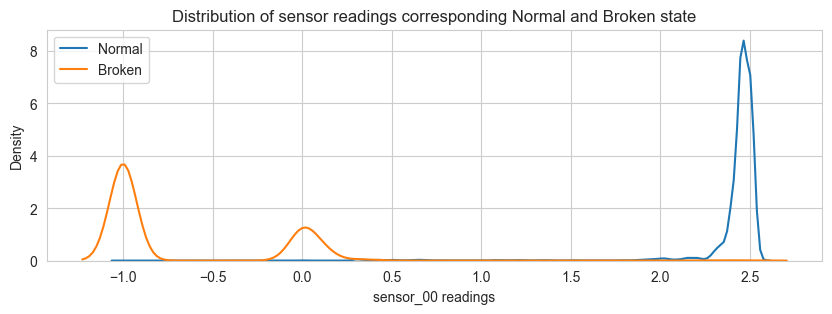

In [ ]:
get_distrib_plot('sensor_00', data_10min_shift)

#### Sensor_01:

In [ ]:
get_distrib_plot('sensor_01', data_10min_shift)

#### Sensor_02:

In [ ]:
get_distrib_plot('sensor_02', data_10min_shift)

#### Sensor_03:

In [ ]:
get_distrib_plot('sensor_03', data_10min_shift)

#### Sensor_04:

In [ ]:
get_distrib_plot('sensor_04', data_10min_shift)

#### Sensor_05:

In [ ]:
get_distrib_plot('sensor_05', data_10min_shift)

#### Sensor_06:

In [ ]:
get_distrib_plot('sensor_06', data_10min_shift)

#### Sensor_07:

In [ ]:
get_distrib_plot('sensor_07', data_10min_shift)

#### Sensor_08:

In [ ]:
get_distrib_plot('sensor_08', data_10min_shift)

#### Sensor_09:

In [ ]:
get_distrib_plot('sensor_09', data_10min_shift)

#### Sensor_10:

In [ ]:
get_distrib_plot('sensor_10', data_10min_shift)

#### Sensor_11:

In [ ]:
get_distrib_plot('sensor_11', data_10min_shift)

#### Sensor_12:

In [ ]:
get_distrib_plot('sensor_12', data_10min_shift)

#### Sensor_13:

In [ ]:
get_distrib_plot('sensor_13', data_10min_shift)

#### Sensor_14:

In [ ]:
get_distrib_plot('sensor_14', data_10min_shift)

#### Sensor_16:

In [ ]:
get_distrib_plot('sensor_16', data_10min_shift)

#### Sensor_17:

In [ ]:
get_distrib_plot('sensor_17', data_10min_shift)

#### Sensor_18:

In [ ]:
get_distrib_plot('sensor_18', data_10min_shift)

#### Sensor_19:

In [ ]:
get_distrib_plot('sensor_19', data_10min_shift)

#### Sensor_20:

In [ ]:
get_distrib_plot('sensor_20', data_10min_shift)

#### Sensor_21:

In [ ]:
get_distrib_plot('sensor_21', data_10min_shift)

#### Sensor_22:

In [ ]:
get_distrib_plot('sensor_22', data_10min_shift)

#### Sensor_23:

In [ ]:
get_distrib_plot('sensor_23', data_10min_shift)

#### Sensor_24:

In [ ]:
get_distrib_plot('sensor_24', data_10min_shift)

#### Sensor_25:

In [ ]:
get_distrib_plot('sensor_25', data_10min_shift)

#### Sensor_27:

In [ ]:
get_distrib_plot('sensor_27', data_10min_shift)

#### Sensor_28:

In [ ]:
get_distrib_plot('sensor_28', data_10min_shift)

#### Sensor_29:

In [ ]:
get_distrib_plot('sensor_29', data_10min_shift)

#### Sensor_30:

In [ ]:
get_distrib_plot('sensor_30', data_10min_shift)

#### Sensor_31:

In [ ]:
get_distrib_plot('sensor_31', data_10min_shift)

#### Sensor_32:

In [ ]:
get_distrib_plot('sensor_32', data_10min_shift)

#### Sensor_33:

In [ ]:
get_distrib_plot('sensor_33', data_10min_shift)

#### Sensor_34:

In [ ]:
get_distrib_plot('sensor_34', data_10min_shift)

#### Sensor_35:

In [ ]:
get_distrib_plot('sensor_35', data_10min_shift)

#### Sensor_36:

In [ ]:
get_distrib_plot('sensor_36', data_10min_shift)

#### Sensor_37:

In [ ]:
get_distrib_plot('sensor_37', data_10min_shift)

#### Sensor_38:

In [ ]:
get_distrib_plot('sensor_38', data_10min_shift)

#### Sensor_39:

In [ ]:
get_distrib_plot('sensor_39', data_10min_shift)

#### Sensor_40:

In [ ]:
get_distrib_plot('sensor_40', data_10min_shift)

#### Sensor_41:

In [ ]:
get_distrib_plot('sensor_41', data_10min_shift)

#### Sensor_42:

In [ ]:
get_distrib_plot('sensor_42', data_10min_shift)

#### Sensor_43:

In [ ]:
get_distrib_plot('sensor_43', data_10min_shift)

#### Sensor_44:

In [ ]:
get_distrib_plot('sensor_44', data_10min_shift)

#### Sensor_45:

In [ ]:
get_distrib_plot('sensor_45', data_10min_shift)

#### Sensor_46:

In [ ]:
get_distrib_plot('sensor_46', data_10min_shift)

#### Sensor_47:

In [ ]:
get_distrib_plot('sensor_47', data_10min_shift)

#### Sensor_48:

In [ ]:
get_distrib_plot('sensor_48', data_10min_shift)

#### Sensor_49:

In [ ]:
get_distrib_plot('sensor_49', data_10min_shift)

#### Sensor_50:

In [ ]:
get_distrib_plot('sensor_50', data_10min_shift)

In [ ]:
get_distrib_plot('sensor_51', data_10min_shift)

### Feature Selection:
* sensor_00, sensor_04, sensor_06, sensor_07, sensor_08, sensor_09, sensor_10, sensor_11  
and sensor_12 are selected for training a classification model

In [54]:
final_sensors = ['sensor_00', 'sensor_04', 'sensor_06', 'sensor_07', 
                 'sensor_08', 'sensor_09', 'sensor_10', 'sensor_11', 
                 'sensor_12']